[*********************100%***********************]  8 of 8 completed


<Axes: xlabel='Date'>

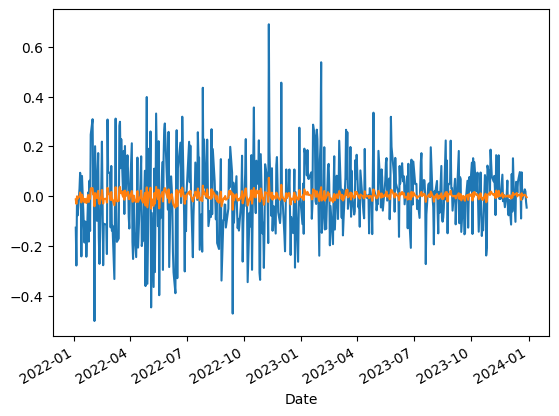

In [1]:
import yfinance as yf
import statsmodels.api as sm


tickers = ['AAPL', 'MSFT', 'AMZN', 'NVDA', 'GOOG', 'META', 'TSLA', 'QQQ']
data = yf.download(tickers, start='2022-01-01', end='2023-12-31')['Adj Close']

benchmark_returns = (
    data
    .pop("QQQ")
    .pct_change()
    .dropna()
)

portfolio_returns = (
    data
    .pct_change()
    .dropna()
    .sum(axis=1)
)

portfolio_returns.plot()
benchmark_returns.plot()

### Getting Historical Data

To fetch historical market data for a specific stock, use the yf.Ticker class. For example, let's fetch data for Apple Inc:

In [2]:
def linreg(x, y):    
    x = sm.add_constant(x)
    model = sm.OLS(y, x).fit()
    return model

X = benchmark_returns.values
Y = portfolio_returns.values

model = linreg(X, Y)
alpha, beta = model.params[0], model.params[1]

print(model.summary())
print(f"Alpha: {alpha}")
print(f"Beta: {beta}")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     7587.
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          1.46e-303
Time:                        09:45:25   Log-Likelihood:                 916.28
No. Observations:                 500   AIC:                            -1829.
Df Residuals:                     498   BIC:                            -1820.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0013      0.002      0.740      0.4

* You can get the historical market data using the history method. By default, it retrieves the last five days of stock data.
* We will now reference the object `apple` when extracting data.

In [3]:
hedged_portfolio_returns = -beta * benchmark_returns + portfolio_returns

P = hedged_portfolio_returns.values
model = linreg(X, P)
alpha, beta = model.params[0], model.params[1]

print(f"Alpha: {alpha}")
print(f"Beta: {round(beta, 6)}")

Alpha: 0.0012835657726588756
Beta: 0.0


* To fetch data for a specific period, you can specify the period or start and end dates:

<Axes: xlabel='Date'>

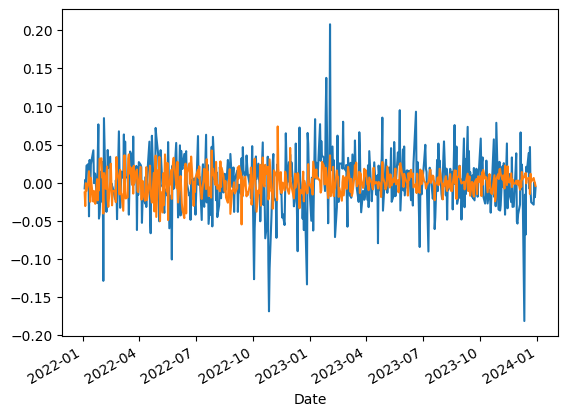

: 

In [ ]:
# Data for a specific period
hedged_portfolio_returns.plot()
benchmark_returns.plot()

In [5]:
print('History: Year - each day')
hist_1year

History: Year - each day


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,71.878871,72.936773,71.624105,72.876114,135480400,0.0,0.0
2020-01-03 00:00:00-05:00,72.099664,72.931908,71.941952,72.167603,146322800,0.0,0.0
2020-01-06 00:00:00-05:00,71.284415,72.781483,71.032070,72.742661,118387200,0.0,0.0
2020-01-07 00:00:00-05:00,72.752363,73.009558,72.179742,72.400543,108872000,0.0,0.0
2020-01-08 00:00:00-05:00,72.102091,73.868490,72.102091,73.565193,132079200,0.0,0.0
...,...,...,...,...,...,...,...
2020-12-24 00:00:00-05:00,128.553200,130.648111,128.337834,129.189499,54930100,0.0,0.0
2020-12-28 00:00:00-05:00,131.166933,134.446342,130.697036,133.810043,124486200,0.0,0.0
2020-12-29 00:00:00-05:00,135.141389,135.865788,131.509549,132.028381,121047300,0.0,0.0


### Adjusting for Stock Splits
yfinance automatically adjusts historical data for stock splits. If you prefer unadjusted data, set auto_adjust to False:

In [6]:
hist_unadj = apple.history(period="1mo", auto_adjust=False)
hist_unadj

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2024-08-26 00:00:00-04:00,226.759995,227.279999,223.889999,227.179993,227.179993,30602200,0.0,0.0
2024-08-27 00:00:00-04:00,226.000000,228.850006,224.889999,228.029999,228.029999,35934600,0.0,0.0
2024-08-28 00:00:00-04:00,227.919998,229.860001,225.679993,226.490005,226.490005,38052200,0.0,0.0
2024-08-29 00:00:00-04:00,230.100006,232.919998,228.880005,229.789993,229.789993,51906300,0.0,0.0
2024-08-30 00:00:00-04:00,230.190002,230.399994,227.479996,229.000000,229.000000,52990800,0.0,0.0
2024-09-03 00:00:00-04:00,228.550003,229.000000,221.169998,222.770004,222.770004,50190600,0.0,0.0
2024-09-04 00:00:00-04:00,221.660004,221.779999,217.479996,220.850006,220.850006,43840200,0.0,0.0
2024-09-05 00:00:00-04:00,221.630005,225.479996,221.520004,222.380005,222.380005,36615400,0.0,0.0
2024-09-06 00:00:00-04:00,223.949997,225.240005,219.770004,220.820007,220.820007,48423000,0.0,0.0


### Including Dividends and Stock Splits
To include dividend and stock split data, set actions to True:

In [7]:
hist_adj = apple.history(period="5y", actions=True)
hist_adj

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-09-25 00:00:00-04:00,52.869647,53.583284,52.528552,53.469585,87613600,0.0,0.0
2019-09-26 00:00:00-04:00,53.220416,53.447813,52.937381,53.193806,75334000,0.0,0.0
2019-09-27 00:00:00-04:00,53.351047,53.452653,52.562418,52.934963,101408000,0.0,0.0
2019-09-30 00:00:00-04:00,53.438140,54.328375,53.411530,54.180809,103909600,0.0,0.0
2019-10-01 00:00:00-04:00,54.446915,55.208933,54.236450,54.330795,139223200,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-19 00:00:00-04:00,224.990005,229.820007,224.630005,228.869995,66781300,0.0,0.0
2024-09-20 00:00:00-04:00,229.970001,233.089996,227.619995,228.199997,318679900,0.0,0.0
2024-09-23 00:00:00-04:00,227.339996,229.449997,225.809998,226.470001,54146000,0.0,0.0


---
## Advanced Usage

### Fetching Data for Multiple Stocks

To fetch data for multiple stocks, pass a list of ticker symbols to yf.download:

In [3]:
df = yf.download("SPX", start="1990-01-02", end="2022-06-24")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-03-02,1.74884,2.49834,1.74884,2.49834,2.49834,2562
2000-03-03,1.87375,1.87375,1.87375,1.87375,1.87375,80
2000-03-06,2.49834,2.49834,2.49834,2.49834,2.49834,240
2000-03-07,4.37209,4.37209,4.37209,4.37209,4.37209,0
2000-03-08,4.37209,4.37209,4.37209,4.37209,4.37209,0
...,...,...,...,...,...,...
2018-01-24,0.05500,0.05500,0.05500,0.05500,0.05500,7000
2018-01-25,0.05500,0.05500,0.05500,0.05500,0.05500,1160
2018-01-26,0.05000,0.05000,0.05000,0.05000,0.05000,1800


### Fetching Real-Time Data
For real-time data, you can use the interval parameter with the history method. For example, fetching minute-level data for the past 5 days:

In [4]:
#CALCULATIONS USING FOR LOOPS - EASIER TO CODE BUT TAKES A LONG TIME TO PROCESS
stop = 0.1220
df['new_high'] = np.nan
df['new_low'] = np.nan
df['signal'] = np.nan
df['new_high'].iloc[0] = df['Close'].iloc[0]
df['new_low'].iloc[0] = df['Close'].iloc[0]
df['signal'].iloc[0] = 1.0


for i in range(1,df.shape[0]):
    #COMPUTE SIGNAL
    if df['signal'].iloc[i-1] == 1.0:
        if df['Close'].iloc[i] < df['new_high'].iloc[i-1]*(1-stop):
            df['signal'].iloc[i] = -1.0
        else:
            df['signal'].iloc[i] = 1.0
    else:
        if df['Close'].iloc[i] > df['new_low'].iloc[i-1]*(1+stop):
            df['signal'].iloc[i] = 1.0
        else:
            df['signal'].iloc[i] = -1.0
    
    #COMPUTE NEW HIGH
    if df['signal'].iloc[i] != df['signal'].iloc[i-1]:
        df['new_high'].iloc[i] = df['Close'].iloc[i]
    else:
        if df['signal'].iloc[i] == 1.0:
            df['new_high'].iloc[i] = np.maximum(df['new_high'].iloc[i-1],df['Close'].iloc[i])
        else:
            df['new_high'].iloc[i] = df['new_high'].iloc[i-1]
            
    #COMPUTE NEW LOW
    if df['signal'].iloc[i] != df['signal'].iloc[i-1]:
        df['new_low'].iloc[i] = df['Close'].iloc[i]
    else:
        if df['signal'].iloc[i] == -1.0:
            df['new_low'].iloc[i] = np.minimum(df['new_low'].iloc[i-1],df['Close'].iloc[i])
        else:
            df['new_low'].iloc[i] = df['new_low'].iloc[i-1]

In [9]:
df['Date'] = df.index
#DATAFRAME FOR VISUAL INSPECTION
df.tail(40)

,Open,High,Low,Close,Adj Close,Volume,new_high,new_low,signal,Date
Date,,,,,,,,,,
2017-12-01,0.040,0.040,0.040,0.040,0.040,0,0.040,0.040,1.0,2017-12-01
2017-12-04,0.040,0.040,0.040,0.040,0.040,0,0.040,0.040,1.0,2017-12-04
2017-12-05,0.040,0.040,0.040,0.040,0.040,0,0.040,0.040,1.0,2017-12-05
2017-12-06,0.035,0.035,0.035,0.035,0.035,27000,0.035,0.035,-1.0,2017-12-06
2017-12-07,0.035,0.035,0.035,0.035,0.035,40590,0.035,0.035,-1.0,2017-12-07
2017-12-08,0.035,0.035,0.035,0.035,0.035,29000,0.035,0.035,-1.0,2017-12-08
2017-12-11,0.035,0.035,0.035,0.035,0.035,237500,0.035,0.035,-1.0,2017-12-11
2017-12-12,0.035,0.040,0.035,0.035,0.035,95000,0.035,0.035,-1.0,2017-12-12
2017-12-13,0.040,0.040,0.040,0.040,0.040,20000,0.040,0.040,1.0,2017-12-13


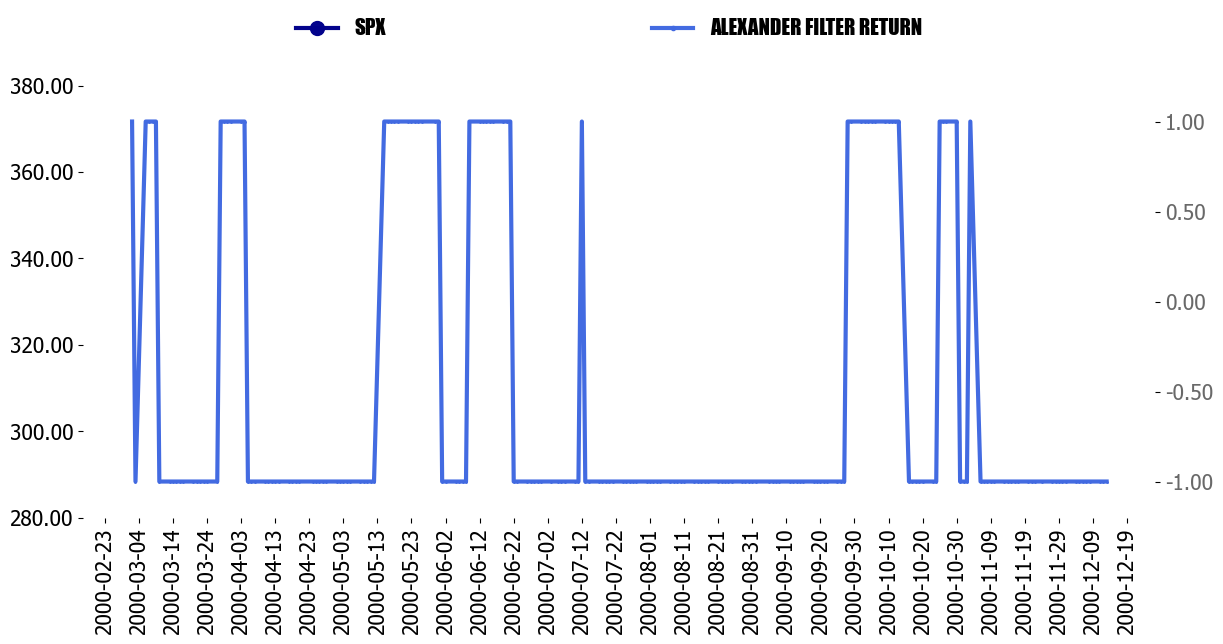

In [10]:
#------------------------CHART - SPX RETURNS VS ALEXANDER FILTER RETURNS-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 10

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df['Date'].head(200),df['Close'].head(200),marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='SPX',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.3, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([None, None, 280, 380])
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(df['Date'].head(200),df['signal'].head(200),marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='ALEXANDER FILTER RETURN',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.8, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.yticks(fontname = "Tahoma",fontsize=15, color='dimgrey')
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([None, None, -1.2, 1.2])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.box(on=None)


plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

In [11]:
#CALCULATIONS USING LAMBDA FUNCTION - MUCH FASTER
stop = 0.1220

NEW_HIGH = df['Close'].iloc[0]
NEW_LOW = df['Close'].iloc[0]
PREVIOUS_SIGNAL = 1.0
SIGNAL = PREVIOUS_SIGNAL

def calculations(SIGNAL,CLOSE):
    global NEW_HIGH
    global NEW_LOW
    global PREVIOUS_SIGNAL
    
    #COMPUTE SIGNAL, NEW_HIGH, NEW_LOW
    if PREVIOUS_SIGNAL == 1.0:
        if CLOSE < NEW_HIGH*(1-stop):            
            SIGNAL = -1.0            
            PREVIOUS_SIGNAL = 1.0
        else:            
            SIGNAL = 1.0
            PREVIOUS_SIGNAL = 1.0
    else:
        if CLOSE > NEW_LOW*(1+stop):            
            SIGNAL = 1.0
            PREVIOUS_SIGNAL = -1.0
        else:            
            SIGNAL = -1.0 
            PREVIOUS_SIGNAL = -1.0
            
    if SIGNAL!= PREVIOUS_SIGNAL:
        NEW_HIGH = CLOSE
        NEW_LOW = CLOSE
        PREVIOUS_SIGNAL = -1.0*PREVIOUS_SIGNAL
    else:
        if SIGNAL == 1.0:
            NEW_HIGH = np.maximum(NEW_HIGH,CLOSE)            
        else:
            NEW_LOW = np.minimum(NEW_LOW,CLOSE)           
            
    
    return SIGNAL, NEW_HIGH, NEW_LOW
            
                
results = df.apply(lambda row: calculations(SIGNAL, CLOSE=row['Close']),axis=1)

In [12]:
#DATAFRAME FOR VISUAL INSPECTION
df['signal'] = [x[0] for x in results]
df['new_high'] = [x[1] for x in results]
df['new_low'] = [x[2] for x in results]

df.tail(40)

,Open,High,Low,Close,Adj Close,Volume,new_high,new_low,signal,Date
Date,,,,,,,,,,
2017-12-01,0.040,0.040,0.040,0.040,0.040,0,0.040,0.040,1.0,2017-12-01
2017-12-04,0.040,0.040,0.040,0.040,0.040,0,0.040,0.040,1.0,2017-12-04
2017-12-05,0.040,0.040,0.040,0.040,0.040,0,0.040,0.040,1.0,2017-12-05
2017-12-06,0.035,0.035,0.035,0.035,0.035,27000,0.035,0.035,-1.0,2017-12-06
2017-12-07,0.035,0.035,0.035,0.035,0.035,40590,0.035,0.035,-1.0,2017-12-07
2017-12-08,0.035,0.035,0.035,0.035,0.035,29000,0.035,0.035,-1.0,2017-12-08
2017-12-11,0.035,0.035,0.035,0.035,0.035,237500,0.035,0.035,-1.0,2017-12-11
2017-12-12,0.035,0.040,0.035,0.035,0.035,95000,0.035,0.035,-1.0,2017-12-12
2017-12-13,0.040,0.040,0.040,0.040,0.040,20000,0.040,0.040,1.0,2017-12-13


In [13]:
#CALCULATE DAILY RETURNS
df['daily_return_mkt'] = df['Close'][1:].values/ df['Close'][:-1]-1
df['daily_return_mkt'] = df['daily_return_mkt'].shift(-1)
df['daily_return_signal'] = df['daily_return_mkt']*df['signal']

df['cumulative_return_mkt']=(1 + df['daily_return_mkt']).cumprod() - 1
df['cumulative_return_mkt'][1:]=df['cumulative_return_mkt'][:-1]
df['cumulative_return_signal']=(1 + df['daily_return_signal']).cumprod() - 1
df['cumulative_return_signal'][1:]=df['cumulative_return_signal'][:-1]

IndexError: single positional indexer is out-of-bounds

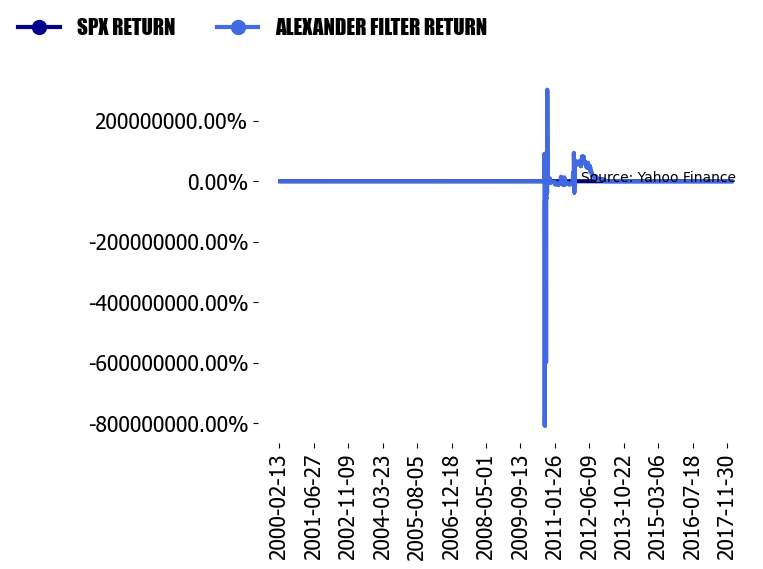

In [14]:
#------------------------CHART - SPX RETURNS VS ALEXANDER FILTER RETURNS-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 500

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df['Date'],df['cumulative_return_mkt']*100,marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='SPX RETURN',markersize=1)
ax1.plot(df['Date'],df['cumulative_return_signal']*100,marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='ALEXANDER FILTER RETURN',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(df['Date'].iloc[-1500], -700,'Source: Yahoo Finance' , color='black', fontsize=10)
plt.text(df['Date'].iloc[-8000], -700,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

In [15]:
# IN SAMPLE DATAFRAME

df_is = df.iloc[0:7500]
df_is['daily_return_mkt'] = df_is['Close'][1:].values/ df_is['Close'][:-1]-1
df_is['daily_return_mkt'] = df_is['daily_return_mkt'].shift(-1)
df_is['cumulative_return_mkt']=(1 + df_is['daily_return_mkt']).cumprod() - 1
df_is['cumulative_return_mkt'][1:]=df_is['cumulative_return_mkt'][:-1]    

stop_loss = [0.025,0.05,0.075,0.1,0.125,0.15]
i = 0

for stop in stop_loss:    
    results = df_is.apply(lambda row: calculations(SIGNAL, CLOSE=row['Close']),axis=1)
    df_is['signal'+ str(i)] = [x[0] for x in results]
    df_is['daily_return_signal'+ str(i)] = df_is['daily_return_mkt']*df_is['signal'+ str(i)]
    df_is['cumulative_return_signal'+ str(i)]=(1 + df_is['daily_return_signal'+ str(i)]).cumprod() - 1
    df_is['cumulative_return_signal'+ str(i)][1:]=df_is['cumulative_return_signal'+ str(i)][:-1]
    i = i + 1

IndexError: single positional indexer is out-of-bounds

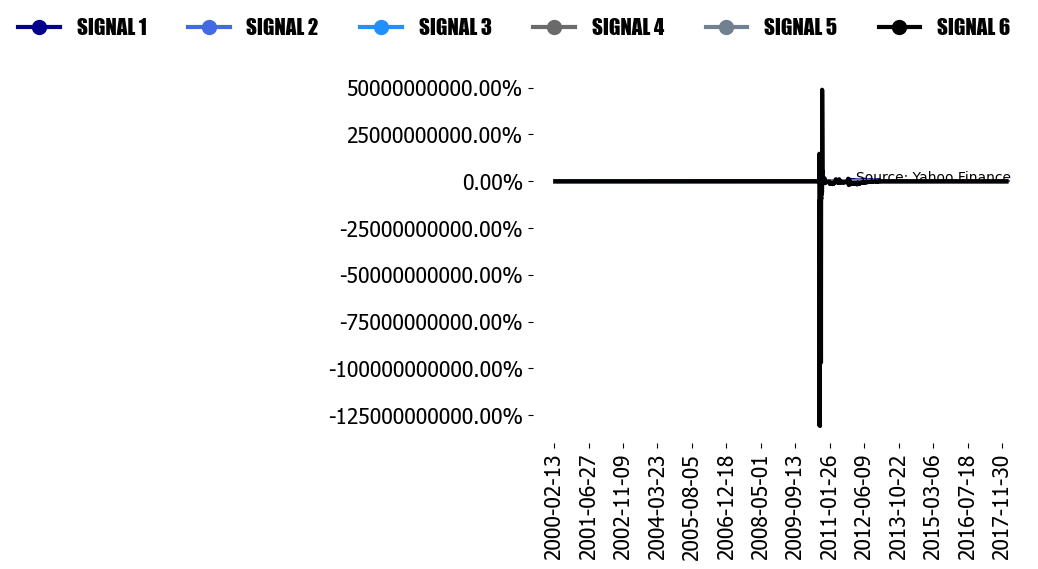

In [16]:
#------------------------CHART - SPX RETURNS VS ALEXANDER FILTER RETURNS-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 500

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal0']*100,marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='SIGNAL 1',markersize=1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal1']*100,marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='SIGNAL 2',markersize=1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal2']*100,marker='o', linestyle='solid',linewidth=3,color='dodgerblue',alpha=0.99,label='SIGNAL 3',markersize=1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal3']*100,marker='o', linestyle='solid',linewidth=3,color='dimgrey',alpha=0.99,label='SIGNAL 4',markersize=1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal4']*100,marker='o', linestyle='solid',linewidth=3,color='slategrey',alpha=0.99,label='SIGNAL 5',markersize=1)
ax1.plot(df_is['Date'],df_is['cumulative_return_signal5']*100,marker='o', linestyle='solid',linewidth=3,color='black',alpha=0.99,label='SIGNAL 6',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(df_is['Date'].iloc[-1500], -550,'Source: Yahoo Finance' , color='black', fontsize=10)
plt.text(df_is['Date'].iloc[-7000], -550,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

In [17]:
#OUT OF SAMPLE DATAFRAME
df_os = df.iloc[7500:8183]
stop = 0.10

NEW_HIGH = df_os['Close'].iloc[0]
NEW_LOW = df_os['Close'].iloc[0]
PREVIOUS_SIGNAL = 1.0
SIGNAL = PREVIOUS_SIGNAL

results = df_os.apply(lambda row: calculations(SIGNAL, CLOSE=row['Close']),axis=1)
df_os['signal'] = [x[0] for x in results]


df_os['daily_return_mkt'] = df_os['Close'][1:].values/ df_os['Close'][:-1]-1
df_os['daily_return_mkt'] = df_os['daily_return_mkt'].shift(-1)
df_os['daily_return_signal'] = df_os['daily_return_mkt']*df_os['signal']
df_os['cumulative_return_mkt']=(1 + df_os['daily_return_mkt']).cumprod() - 1
df_os['cumulative_return_mkt'][1:]=df_os['cumulative_return_mkt'][:-1]
df_os['cumulative_return_signal']=(1 + df_os['daily_return_signal']).cumprod() - 1
df_os['cumulative_return_signal'][1:]=df_os['cumulative_return_signal'][:-1]

#------------------------CHART - SPX RETURNS VS ALEXANDER FILTER RETURNS-----------------------------------#
font = font_manager.FontProperties(family='Impact',weight='bold', style='normal', size=15)
tick_spacing1 = 100

fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
ax1.plot(df_os['Date'],df_os['cumulative_return_mkt']*100,marker='o', linestyle='solid',linewidth=3,color='darkblue',alpha=0.99,label='SPX RETURN',markersize=1)
ax1.plot(df_os['Date'],df_os['cumulative_return_signal']*100,marker='o', linestyle='solid',linewidth=3,color='royalblue',alpha=0.99,label='ALEXANDER FILTER RETURN',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.5, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing1))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
vals = ax1.get_yticks()
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)

plt.text(df['Date'].iloc[-300], -100,'Source: Yahoo Finance' , color='black', fontsize=10)
plt.text(df['Date'].iloc[-1100], -100,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

IndexError: single positional indexer is out-of-bounds